# Solow Model Demonstration

Here we simulate the Solow model using Python.  We make use of the Python packages `numpy` to execute the simulation and `matplot` for visualizing our simulation.  

Recall that our exogenous parameters include the savings rate ($s$), population growth rate ($n$), technology growth rate ($g$), depreciation rate ($d$) and capital share of output ($\alpha$).  First we specify these values in the Python code.  Then we pick an arbitrary initial value for the capital stock ($k_0$) and choose the number of time periods we want to simulate.

Lastly, we define a `function` using the command `def` which takes all of our exogenous parameters as inputs and computes the path of capital, investment, and output according the equations of our Solow model.  

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
s = 0.2       # savings rate
n = 0.01      # population growth rate
g = 0.02      # technological growth rate
d = 0.1       # depreciation rate
alpha = 0.3   # capital share of output

# Initial values
k0 = 1        # initial capital stock
tmax = 100    # number of periods

# Solow model simulation function
def solow_model(k0, s, n, g, d, alpha, tmax):
    k = np.zeros(tmax)  # Create empty vectors to store the simulated values
    output = np.zeros(tmax)
    investment = np.zeros(tmax)
    break_even_investment = np.zeros(tmax)
    
    k[0] = k0   # Initial condition for the capital stock
    investment[0] = s * k[0]**alpha # Investment equation from our model
    break_even_investment[0] = (n + g + d) * k[0]   # Break-even investment equation from our model
    output[0] = k[0]**alpha # Output equation from our model
    
    # Simulate the path for capital using the law of motion for capital equation and the resulting endogenous variables
    for t in range(1, tmax): 
        k[t] = ((1 - d) * k[t-1] + s * k[t-1]**alpha) / (1 + n + g)
        investment[t] = s * k[t]**alpha
        break_even_investment[t] = (n + g + d) * k[t]
        output[t] = k[t]**alpha
        
    return k, output, investment, break_even_investment

# Run simulation
k, output, investment, break_even_investment = solow_model(k0, s, n, g, d, alpha, tmax)

The code above simulates the Solow model and stores the path of our economy in the variables `k, output, investment, break_even_investment`.  Now we want to visualize that path.  Below we compute the steady state values of capital and output using the formulas derived from our theoretical model, and then use `matplot` to plot the Solow diagram.  

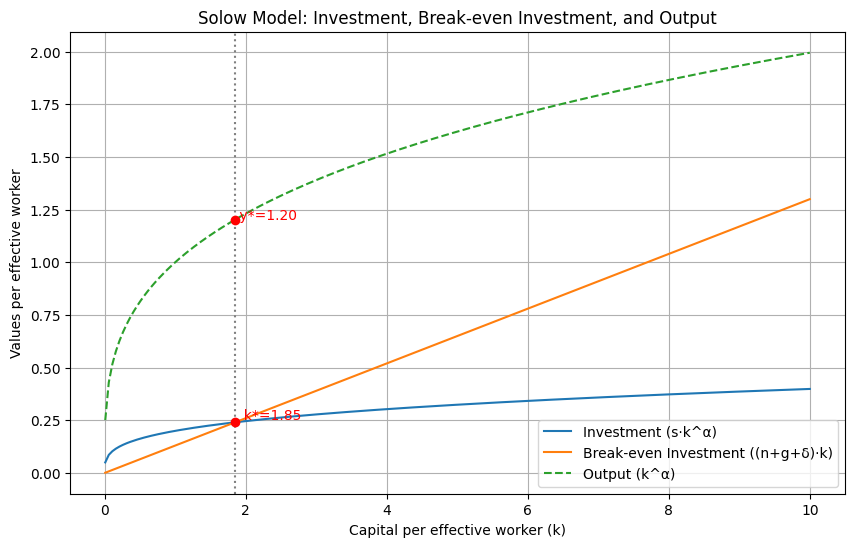

In [40]:
# Compute steady state k*
k_star = (s / (n + g + d))**(1 / (1 - alpha))
y_star = k_star**alpha
i_star = s * y_star

# Capital values for plotting
k_vals = np.linspace(0.01, 10, 200)
investment_curve = s * k_vals**alpha
break_even_curve = (n + g + d) * k_vals
output_curve = k_vals**alpha

# Plot investment, break-even, and output vs k
plt.figure(figsize=(10, 6))

plt.plot(k_vals, investment_curve, label="Investment (s·k^α)")
plt.plot(k_vals, break_even_curve, label="Break-even Investment ((n+g+δ)·k)")
plt.plot(k_vals, output_curve, label="Output (k^α)", linestyle="--")

# Mark steady state
plt.axvline(k_star, color="gray", linestyle=":")
plt.scatter([k_star], [i_star], color="red", zorder=5)
plt.text(k_star, i_star*1.05, f"  k*={k_star:.2f}", color="red")

# Mark steady state (investment and output) - no legend entries
plt.scatter([k_star], [y_star], color="red", zorder=5)
plt.text(k_star, y_star, f" y*={y_star:.2f}", color="red")

# Title the figure and label the axis
plt.xlabel("Capital per effective worker (k)")
plt.ylabel("Values per effective worker")
plt.title("Solow Model: Investment, Break-even Investment, and Output")
plt.legend()
plt.grid(True)
plt.show()

The figure above shows that capital per effective worker grows until it reaches it's steady state value of $k^*=1.85$, at which point break-even investment equals actual investment so that the capital stock neither grows or shrinks.  The corresponding amount of steady state output per effective worker is $y^*=1.20$.  To solidify our understanding of the dynamics, we can also plot the simulated economy *over time*.  Although we don't learn any new information relative to the Solow diagram, it may be useful to visualize the trajectory of the economy over time. We simply amend our `plot` to use time `t` as the dependent variable rather than the capital stock `k_vals`.

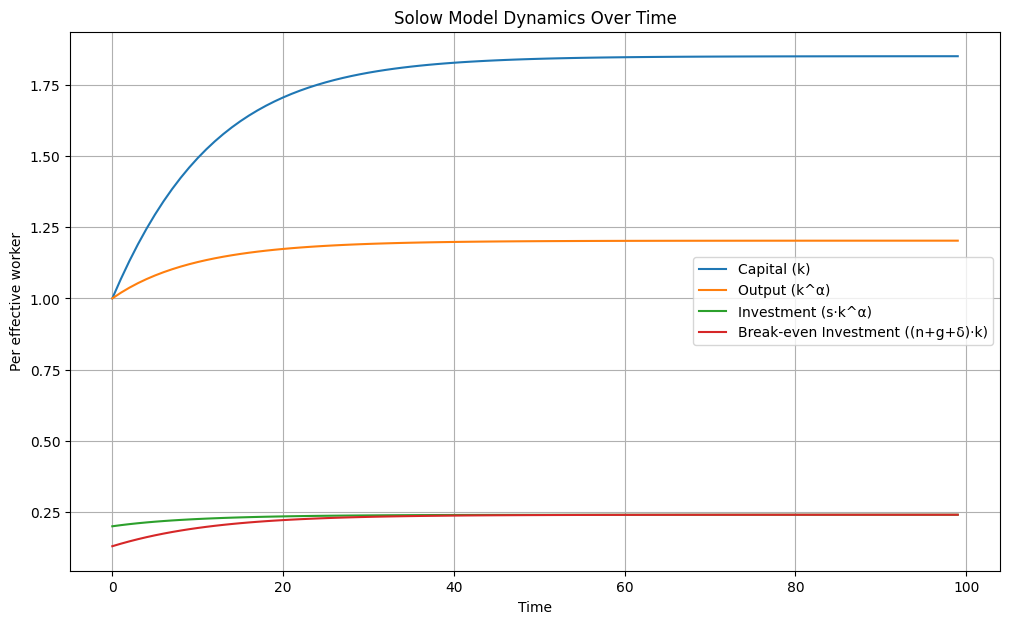

In [41]:
# Time axis
t = np.arange(tmax)

plt.figure(figsize=(12, 7))

# Plot output, investment, and break-even investment over time
plt.plot(t, k, label="Capital (k)")
plt.plot(t, output, label="Output (k^α)")
plt.plot(t, investment, label="Investment (s·k^α)")
plt.plot(t, break_even_investment, label="Break-even Investment ((n+g+δ)·k)")

plt.xlabel("Time")
plt.ylabel("Per effective worker")
plt.title("Solow Model Dynamics Over Time")
plt.legend()
plt.grid(True)
plt.show()


The capital stock initially rises very fast because actual investment is substantially larger than break-even investment.  Capital continues to grow but at a diminishing rate until it reaches its steady state value where the break-even investment and investment line coincide.  Output follows the same dynamics because it is simply an exponential function of the capital stock. 